In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show current working directory
print("Current working directory:")
print(os.getcwd())

# List files in the current folder
print("\nFiles in current folder:")
print(os.listdir())

# Try to locate CAC40_clean.csv anywhere under this directory
target = "CAC40_clean.csv"
found_paths = []

for root, dirs, files in os.walk("."):
    if target in files:
        full_path = os.path.join(root, target)
        found_paths.append(full_path)

print("\nSearch results for CAC40_clean.csv:")
if found_paths:
    for p in found_paths:
        print("Found at:", p)
else:
    print("No file named CAC40_clean.csv found under the current directory.")


Current working directory:
C:\Users\rezgu\CAC40_Analysis_project

Files in current folder:
['.ipynb_checkpoints', '01_data_cleaning.ipynb', 'cac40_index_analysis.ipynb', 'CAC40_index_for_powerbi.csv', 'cac40_stocks_analysis.ipynb', 'cleaned_stocks', 'factor_model_and_portfolio.ipynb', 'index_exports', 'powerbi_exports', 'results_csv', 'results_plots', 'stocks']

Search results for CAC40_clean.csv:
Found at: .\cleaned_stocks\CAC40_clean.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Correct path based on your file structure
file_path = "cleaned_stocks/CAC40_clean.csv"

# Load CAC40 data
df = pd.read_csv(file_path, parse_dates=["date"])

# Display structure
print("Columns:", df.columns.tolist())
df.head()


Columns: ['date', 'close', 'open', 'high', 'low', 'volume', 'variation_pct', 'ticker']


date    close     open     high      low       volume  variation_pct  \
0 2015-01-02  4252.29  4294.05  4311.00  4224.34   69810000.0         0.0048   
1 2015-01-05  4111.36  4221.99  4276.92  4105.45  137890000.0         0.0331   
2 2015-01-06  4083.50  4129.89  4151.41  4076.16  130810000.0         0.0068   
3 2015-01-07  4112.73  4111.73  4144.95  4080.78  121320000.0         0.0072   
4 2015-01-08  4260.19  4176.16  4270.11  4163.63  154420000.0         0.0359   

  ticker  
0  CAC40  
1  CAC40  
2  CAC40  
3  CAC40  
4  CAC40

In [3]:
# 3. Ensure data is sorted by date
df = df.sort_values("date").reset_index(drop=True)

# 4. Set 'date' as index for time-series analysis
df = df.set_index("date")

# 5. Check structure
print(df.info())

# 6. Check missing values
print("\nMissing values per column:")
print(df.isna().sum())

print("\nPercentage of missing values:")
print((df.isna().mean() * 100).round(2))

# Display first rows after setting index
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2762 entries, 2015-01-02 to 2025-10-14
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close          2762 non-null   float64
 1   open           2762 non-null   float64
 2   high           2762 non-null   float64
 3   low            2762 non-null   float64
 4   volume         2762 non-null   float64
 5   variation_pct  2762 non-null   float64
 6   ticker         2762 non-null   object 
dtypes: float64(6), object(1)
memory usage: 172.6+ KB
None

Missing values per column:
close            0
open             0
high             0
low              0
volume           0
variation_pct    0
ticker           0
dtype: int64

Percentage of missing values:
close            0.0
open             0.0
high             0.0
low              0.0
volume           0.0
variation_pct    0.0
ticker           0.0
dtype: float64


close     open     high      low       volume  variation_pct  \
date                                                                         
2015-01-02  4252.29  4294.05  4311.00  4224.34   69810000.0         0.0048   
2015-01-05  4111.36  4221.99  4276.92  4105.45  137890000.0         0.0331   
2015-01-06  4083.50  4129.89  4151.41  4076.16  130810000.0         0.0068   
2015-01-07  4112.73  4111.73  4144.95  4080.78  121320000.0         0.0072   
2015-01-08  4260.19  4176.16  4270.11  4163.63  154420000.0         0.0359   

           ticker  
date               
2015-01-02  CAC40  
2015-01-05  CAC40  
2015-01-06  CAC40  
2015-01-07  CAC40  
2015-01-08  CAC40

In [4]:
# 7. Compute daily returns from close price
df["return"] = df["close"].pct_change()

# 8. Drop the first NaN created by pct_change
df = df.dropna().copy()

# Quick verification
df[["close", "return"]].head()


close    return
date                         
2015-01-05  4111.36 -0.033142
2015-01-06  4083.50 -0.006776
2015-01-07  4112.73  0.007158
2015-01-08  4260.19  0.035855
2015-01-09  4179.07 -0.019041

In [5]:
# 9. Descriptive statistics for close price
print("Descriptive statistics for close price:")
print(df["close"].describe())

# 10. Descriptive statistics for daily returns
print("\nDescriptive statistics for daily returns:")
print(df["return"].describe())

# 11. Additional statistical metrics for returns
mean_return = df["return"].mean()
std_return = df["return"].std()
skew_return = df["return"].skew()
kurt_return = df["return"].kurtosis()

print("\nAdditional metrics for returns:")
print(f"Mean daily return: {mean_return:.6f}")
print(f"Std deviation of daily returns: {std_return:.6f}")
print(f"Skewness: {skew_return:.6f}")
print(f"Kurtosis: {kurt_return:.6f}")


Descriptive statistics for close price:
count    2761.000000
mean     5946.170739
std      1154.679503
min      3754.840000
25%      5007.140000
50%      5558.420000
75%      7077.160000
max      8239.990000
Name: close, dtype: float64

Descriptive statistics for daily returns:
count    2761.000000
mean        0.000294
std         0.011711
min        -0.122768
25%        -0.005031
50%         0.000754
75%         0.006206
max         0.083895
Name: return, dtype: float64

Additional metrics for returns:
Mean daily return: 0.000294
Std deviation of daily returns: 0.011711
Skewness: -0.649701
Kurtosis: 9.969796


In [6]:
# 12. Define number of trading days per year
trading_days = 252

# 13. Compute daily volatility (standard deviation of returns)
daily_vol = df["return"].std()

# 14. Compute annualized volatility
annual_vol = daily_vol * np.sqrt(trading_days)

print(f"Daily volatility: {daily_vol:.6f}")
print(f"Annualized volatility: {annual_vol:.6f}")

# 15. Compute rolling annualized volatility
df["roll_vol_20"] = df["return"].rolling(window=20).std() * np.sqrt(trading_days)   # 1 month
df["roll_vol_60"] = df["return"].rolling(window=60).std() * np.sqrt(trading_days)   # 3 months
df["roll_vol_120"] = df["return"].rolling(window=120).std() * np.sqrt(trading_days) # 6 months

# Show last values to confirm
df[["roll_vol_20", "roll_vol_60", "roll_vol_120"]].tail()


Daily volatility: 0.011711
Annualized volatility: 0.185914


roll_vol_20  roll_vol_60  roll_vol_120
date                                              
2025-10-08     0.113230     0.130930      0.127829
2025-10-09     0.111783     0.128576      0.124363
2025-10-10     0.126620     0.132608      0.126456
2025-10-13     0.122714     0.132472      0.126344
2025-10-14     0.116985     0.131698      0.126214

In [7]:
# 16. Compute equity curve (cumulative performance over time)
df["equity_curve"] = (1 + df["return"]).cumprod()

# 17. Compute running maximum of the equity curve
df["running_max"] = df["equity_curve"].cummax()

# 18. Compute drawdown (percentage drop from the last peak)
df["drawdown"] = df["equity_curve"] / df["running_max"] - 1

# 19. Maximum drawdown (worst historical drop)
max_drawdown = df["drawdown"].min()

print(f"Maximum drawdown: {max_drawdown:.2%}")

# Show last values
df[["equity_curve", "running_max", "drawdown"]].tail()


Maximum drawdown: -38.56%


equity_curve  running_max  drawdown
date                                           
2025-10-08      1.895480     1.937777 -0.021828
2025-10-09      1.891066     1.937777 -0.024106
2025-10-10      1.862056     1.937777 -0.039077
2025-10-13      1.865879     1.937777 -0.037103
2025-10-14      1.862436     1.937777 -0.038880

In [8]:
# 20. Compute mean and standard deviation of daily returns
mean_daily_return = df["return"].mean()
std_daily_return = df["return"].std()

# 21. Sharpe ratio (risk-free rate = 0)
sharpe_ratio = (mean_daily_return / std_daily_return) * np.sqrt(trading_days)

print(f"Mean daily return: {mean_daily_return:.6f}")
print(f"Std dev daily return: {std_daily_return:.6f}")
print(f"Annualized Sharpe ratio (rf = 0): {sharpe_ratio:.3f}")


Mean daily return: 0.000294
Std dev daily return: 0.011711
Annualized Sharpe ratio (rf = 0): 0.399


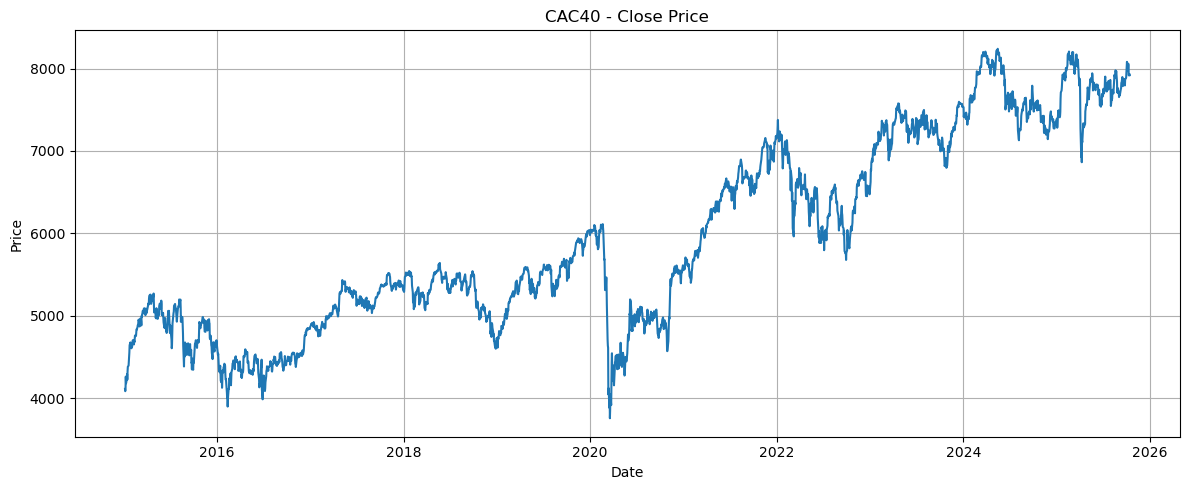

In [9]:
# 22. Plot the close price of the CAC40 index
plt.figure(figsize=(12,5))                             # Set figure size
plt.plot(df.index, df["close"], label="Close Price")   # Plot the close price against the date index
plt.title("CAC40 - Close Price")                       # Title of the chart
plt.xlabel("Date")                                     # Label for x-axis
plt.ylabel("Price")                                    # Label for y-axis
plt.grid(True)                                         # Add gridlines for readability
plt.tight_layout()                                     # Adjust layout
plt.show()                                             # Display the plot


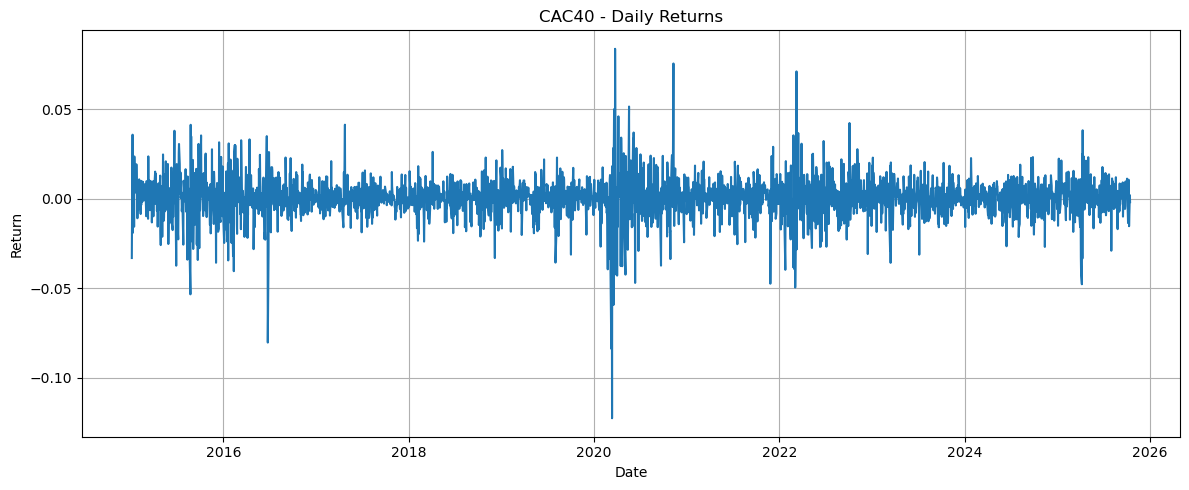

In [10]:
# 23. Plot the daily returns of the CAC40 index
plt.figure(figsize=(12,5))                              # Set figure size
plt.plot(df.index, df["return"], label="Daily Returns") # Plot daily returns
plt.title("CAC40 - Daily Returns")                      # Chart title
plt.xlabel("Date")                                      # X-axis label
plt.ylabel("Return")                                    # Y-axis label
plt.grid(True)                                          # Add gridlines
plt.tight_layout()                                      # Adjust layout
plt.show()                                              # Display the plot


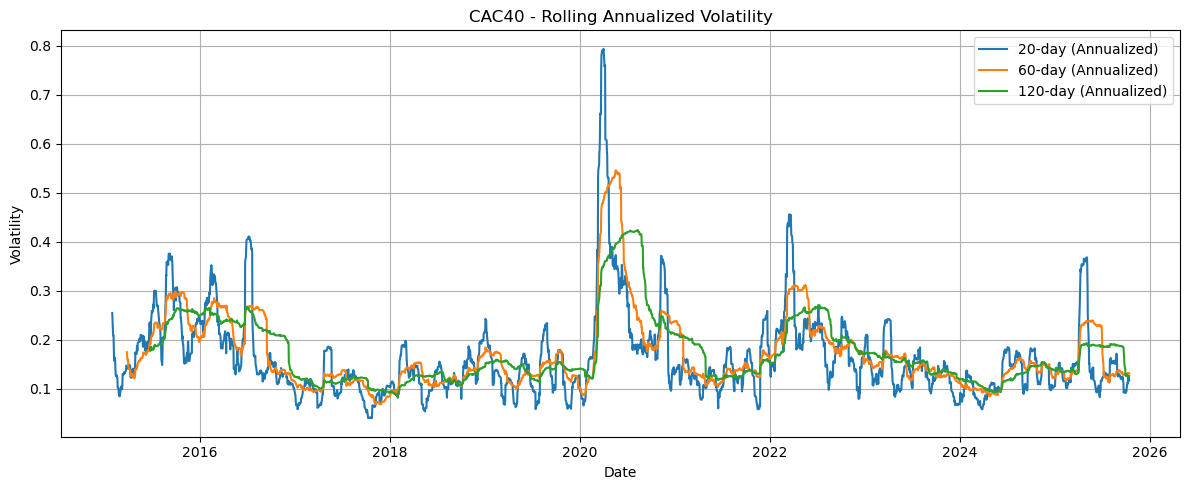

In [11]:
# 24. Plot rolling annualized volatility (20, 60, 120 days)
plt.figure(figsize=(12,5))                                   # Set figure size
plt.plot(df.index, df["roll_vol_20"], label="20-day (Annualized)")   # 20-day rolling vol
plt.plot(df.index, df["roll_vol_60"], label="60-day (Annualized)")   # 60-day rolling vol
plt.plot(df.index, df["roll_vol_120"], label="120-day (Annualized)") # 120-day rolling vol
plt.title("CAC40 - Rolling Annualized Volatility")           # Title
plt.xlabel("Date")                                           # X-axis label
plt.ylabel("Volatility")                                     # Y-axis label
plt.legend()                                                 # Show legend for lines
plt.grid(True)                                               # Add gridlines
plt.tight_layout()                                           # Adjust layout
plt.show()                                                   # Display plot


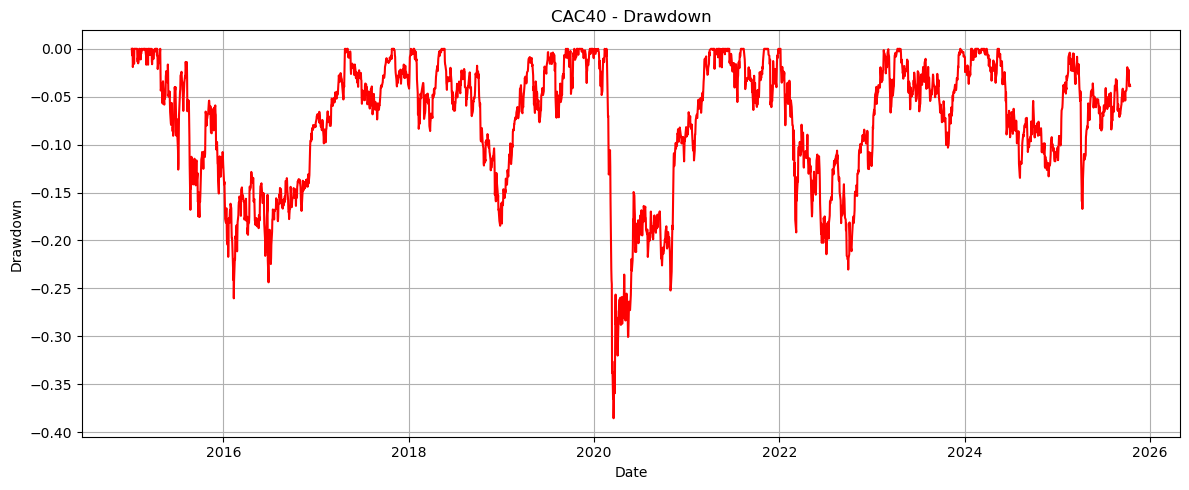

In [12]:
# 25. Plot the drawdown of the CAC40 index
plt.figure(figsize=(12,5))                         # Set figure size
plt.plot(df.index, df["drawdown"], color="red")    # Drawdown plotted in red
plt.title("CAC40 - Drawdown")                      # Chart title
plt.xlabel("Date")                                 # X-axis label
plt.ylabel("Drawdown")                             # Y-axis label
plt.grid(True)                                     # Add gridlines
plt.tight_layout()                                 # Adjust layout
plt.show()                                         # Display plot


In [13]:
# 26. Normality tests for daily returns
from scipy.stats import shapiro, jarque_bera

# Shapiro-Wilk test (good for small/medium samples)
stat_shapiro, p_shapiro = shapiro(df["return"])

# Jarque-Bera test (designed for financial returns)
stat_jb, p_jb = jarque_bera(df["return"])

print("=== Normality Tests ===")
print(f"Shapiro-Wilk test: statistic={stat_shapiro:.6f}, p-value={p_shapiro:.6f}")
print(f"Jarque-Bera test: statistic={stat_jb:.6f}, p-value={p_jb:.6f}")

# Interpretation hint (not a conclusion):
# A very small p-value means returns are NOT normally distributed,
# which is typical for financial markets.


=== Normality Tests ===
Shapiro-Wilk test: statistic=0.916311, p-value=0.000000
Jarque-Bera test: statistic=11582.478170, p-value=0.000000


In [14]:
# 27. Augmented Dickey-Fuller test (ADF) for stationarity of returns
from statsmodels.tsa.stattools import adfuller

# ADF test on returns (prices are non-stationary; returns are usually stationary)
adf_result = adfuller(df["return"])

print("=== ADF Test (Returns) ===")
print(f"ADF Statistic: {adf_result[0]:.6f}")        # ADF test statistic
print(f"p-value: {adf_result[1]:.6f}")              # p-value
print("Critical values:")                          # Critical values
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.6f}")

# Interpretation hint:
# p-value < 0.05 generally means the returns series is stationary.


=== ADF Test (Returns) ===
ADF Statistic: -10.362416
p-value: 0.000000
Critical values:
   1%: -3.432746
   5%: -2.862599
   10%: -2.567333


<Figure size 1000x400 with 0 Axes>

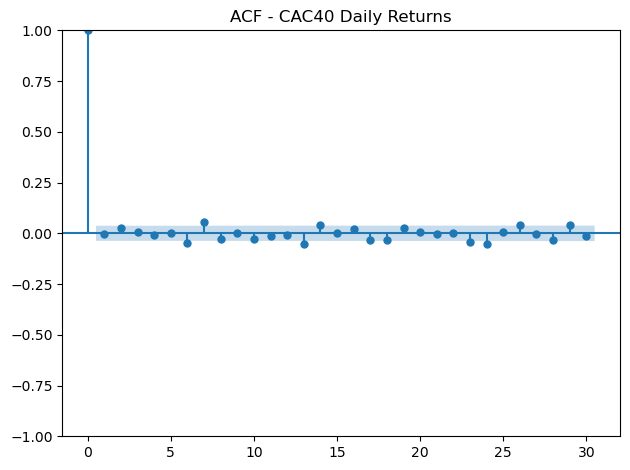

<Figure size 1000x400 with 0 Axes>

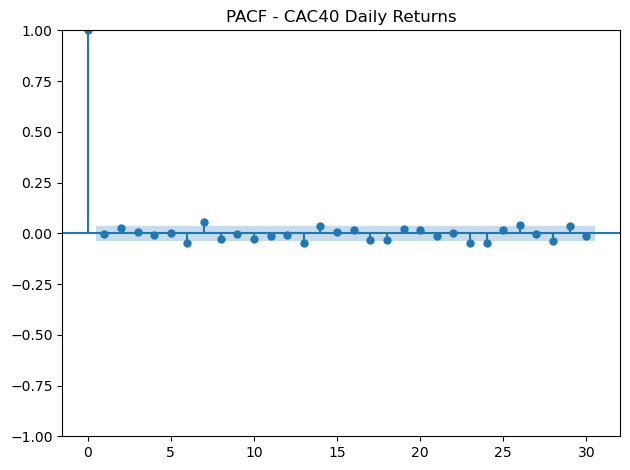

In [15]:
# 28. Autocorrelation analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF (Autocorrelation Function)
plt.figure(figsize=(10,4))
plot_acf(df["return"], lags=30)
plt.title("ACF - CAC40 Daily Returns")
plt.tight_layout()
plt.show()

# Plot PACF (Partial Autocorrelation Function)
plt.figure(figsize=(10,4))
plot_pacf(df["return"], lags=30)
plt.title("PACF - CAC40 Daily Returns")
plt.tight_layout()
plt.show()

# Interpretation hint:
# Financial returns typically show near-zero autocorrelation except at lag 1 or 2.


In [16]:
# 29. Compute moving averages for trend analysis
df["sma20"] = df["close"].rolling(window=20).mean()    # 20-day simple moving average
df["sma50"] = df["close"].rolling(window=50).mean()    # 50-day simple moving average
df["sma200"] = df["close"].rolling(window=200).mean()  # 200-day simple moving average

# Show last values to confirm calculation
df[["close", "sma20", "sma50", "sma200"]].tail()


close      sma20      sma50      sma200
date                                                 
2025-10-08  8060.13  7897.1730  7817.2244  7780.42835
2025-10-09  8041.36  7908.0650  7822.6122  7783.85830
2025-10-10  7918.00  7912.7030  7830.0490  7786.88050
2025-10-13  7934.26  7914.5695  7836.0940  7789.64810
2025-10-14  7919.62  7919.6395  7842.0656  7792.27740

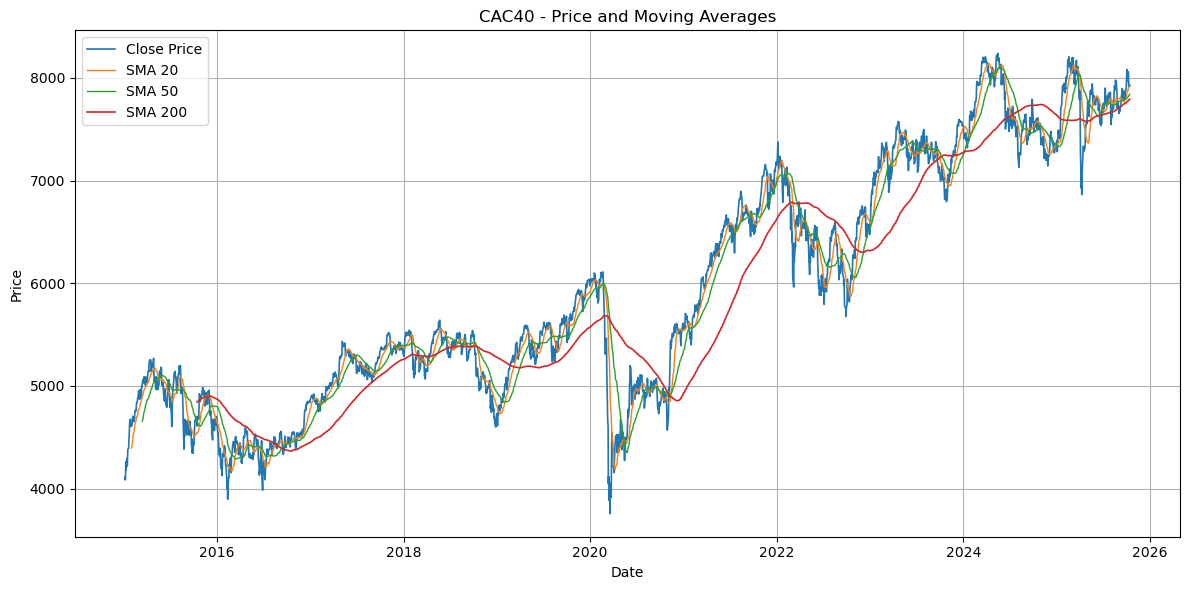

In [17]:
# 30. Plot closing price with moving averages
plt.figure(figsize=(12,6))

plt.plot(df.index, df["close"], label="Close Price", linewidth=1.2)
plt.plot(df.index, df["sma20"], label="SMA 20", linewidth=1.0)
plt.plot(df.index, df["sma50"], label="SMA 50", linewidth=1.0)
plt.plot(df.index, df["sma200"], label="SMA 200", linewidth=1.2)

plt.title("CAC40 - Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# ============================================================
# FIXED: COMPUTE TESTS & EXPORT EVERYTHING FOR CAC40 INDEX
# ============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, jarque_bera
from statsmodels.tsa.stattools import adfuller

os.makedirs("index_exports", exist_ok=True)

# ------------------------------------------------------------
# 1. RECOMPUTE normality tests (fix missing variables)
# ------------------------------------------------------------
shapiro_stat, shapiro_p = shapiro(df["return"])
jb_stat, jb_p = jarque_bera(df["return"])

# ------------------------------------------------------------
# 2. RECOMPUTE ADF test (fix tuple extraction)
# ------------------------------------------------------------
adf_res = adfuller(df["return"])
adf_stat = adf_res[0]
adf_p = adf_res[1]
adf_crit = adf_res[4]

# ------------------------------------------------------------
# 3. SAVE full dataset
# ------------------------------------------------------------
df.to_csv("index_exports/CAC40_index_dataset.csv")
print("Saved: CAC40_index_dataset.csv")

# ------------------------------------------------------------
# 4. SAVE summary metrics
# ------------------------------------------------------------
summary_index = {
    "daily_volatility": [daily_vol],
    "annual_volatility": [annual_vol],
    "max_drawdown": [max_drawdown],
    "mean_daily_return": [mean_daily_return],
    "std_daily_return": [std_daily_return],
    "sharpe_ratio": [sharpe_ratio],
}
pd.DataFrame(summary_index).to_csv("index_exports/CAC40_summary_metrics.csv", index=False)
print("Saved: CAC40_summary_metrics.csv")

# ------------------------------------------------------------
# 5. SAVE normality test results
# ------------------------------------------------------------
normality = {
    "shapiro_stat": [shapiro_stat],
    "shapiro_p": [shapiro_p],
    "jb_stat": [jb_stat],
    "jb_p": [jb_p],
}
pd.DataFrame(normality).to_csv("index_exports/CAC40_normality_tests.csv", index=False)
print("Saved: CAC40_normality_tests.csv")

# ------------------------------------------------------------
# 6. SAVE ADF test results
# ------------------------------------------------------------
adf_dict = {
    "ADF_statistic": [adf_stat],
    "ADF_p_value": [adf_p],
    "critical_1%": [adf_crit["1%"]],
    "critical_5%": [adf_crit["5%"]],
    "critical_10%": [adf_crit["10%"]],
}
pd.DataFrame(adf_dict).to_csv("index_exports/CAC40_adf_test.csv", index=False)
print("Saved: CAC40_adf_test.csv")

# ------------------------------------------------------------
# 7. SAVE PLOTS
# ------------------------------------------------------------

# Rolling volatility
plt.figure(figsize=(12,6))
plt.plot(df["roll_vol_20"], label="20D vol")
plt.plot(df["roll_vol_60"], label="60D vol")
plt.plot(df["roll_vol_120"], label="120D vol")
plt.title("CAC40 Rolling Annualized Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("index_exports/CAC40_rolling_vol.png", dpi=300)
plt.close()
print("Saved: CAC40_rolling_vol.png")

# Drawdown
plt.figure(figsize=(12,6))
plt.plot(df["drawdown"], color="red")
plt.title("CAC40 Drawdown Curve")
plt.grid(True)
plt.tight_layout()
plt.savefig("index_exports/CAC40_drawdown.png", dpi=300)
plt.close()
print("Saved: CAC40_drawdown.png")

# Returns distribution
plt.figure(figsize=(10,5))
sns.histplot(df["return"], bins=50, kde=True)
plt.title("CAC40 Returns Distribution")
plt.grid(True)
plt.tight_layout()
plt.savefig("index_exports/CAC40_returns_distribution.png", dpi=300)
plt.close()
print("Saved: CAC40_returns_distribution.png")

print("\n=== ALL INDEX FILES SAVED SUCCESSFULLY ===")


Saved: CAC40_index_dataset.csv
Saved: CAC40_summary_metrics.csv
Saved: CAC40_normality_tests.csv
Saved: CAC40_adf_test.csv
Saved: CAC40_rolling_vol.png
Saved: CAC40_drawdown.png
Saved: CAC40_returns_distribution.png

=== ALL INDEX FILES SAVED SUCCESSFULLY ===


In [19]:
import pandas as pd
print(pd.read_csv("index_exports/CAC40_summary_metrics.csv"))


   daily_volatility  annual_volatility  max_drawdown  mean_daily_return  \
0          0.011711           0.185914     -0.385585           0.000294   

   std_daily_return  sharpe_ratio  
0          0.011711      0.398788  


In [20]:
print(pd.read_csv("index_exports/CAC40_normality_tests.csv"))


   shapiro_stat     shapiro_p      jb_stat  jb_p
0      0.916311  1.300051e-36  11582.47817   0.0


In [21]:
print(pd.read_csv("index_exports/CAC40_adf_test.csv"))


   ADF_statistic   ADF_p_value  critical_1%  critical_5%  critical_10%
0     -10.362416  2.377490e-18    -3.432746    -2.862599     -2.567333


In [22]:
import pandas as pd
import numpy as np

# ============================================================
# 1. Load the original cleaned CAC40 index file
#    (ADAPT THE PATH IF NEEDED)
# ============================================================
df = pd.read_csv("cleaned_stocks/CAC40_clean.csv", parse_dates=["date"])
df = df.sort_values("date")

# Sanity check
print(df.head())
print(df.dtypes)

# We assume you have at least: date, close
if "close" not in df.columns:
    raise ValueError("Column 'close' not found in CAC40_clean.csv")

# ============================================================
# 2. Recompute all needed columns for Power BI
# ============================================================

trading_days = 252

# Returns
df["return"] = df["close"].pct_change()

# Equity curve and drawdown
df["equity_curve"] = (1 + df["return"]).cumprod()
df["running_max"]  = df["equity_curve"].cummax()
df["drawdown"]     = df["equity_curve"] / df["running_max"] - 1.0

# Rolling vols (annualized)
df["roll_vol_20"]  = df["return"].rolling(20).std()  * np.sqrt(trading_days)
df["roll_vol_60"]  = df["return"].rolling(60).std()  * np.sqrt(trading_days)
df["roll_vol_120"] = df["return"].rolling(120).std() * np.sqrt(trading_days)

# Simple moving averages (optional but useful)
df["sma20"]  = df["close"].rolling(20).mean()
df["sma50"]  = df["close"].rolling(50).mean()
df["sma200"] = df["close"].rolling(200).mean()

# Drop initial NaN rows if needed
df = df.dropna().reset_index(drop=True)

# ============================================================
# 3. Force correct numeric types
# ============================================================

numeric_cols = [
    "close", "return",
    "equity_curve", "running_max", "drawdown",
    "roll_vol_20", "roll_vol_60", "roll_vol_120",
    "sma20", "sma50", "sma200"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# OPTIONAL: if you have volume or other numeric columns, add them here:
# numeric_cols += ["open", "high", "low", "volume", "variation_pct"]

print("\nDtypes after conversion:")
print(df.dtypes)

# ============================================================
# 4. Export a CLEAN CSV for Power BI
# ============================================================

output_path = "CAC40_index_for_powerbi.csv"
df.to_csv(output_path, index=False, float_format="%.6f")

print(f"\nExported clean file for Power BI: {output_path}")


        date    close     open     high      low       volume  variation_pct  \
0 2015-01-02  4252.29  4294.05  4311.00  4224.34   69810000.0         0.0048   
1 2015-01-05  4111.36  4221.99  4276.92  4105.45  137890000.0         0.0331   
2 2015-01-06  4083.50  4129.89  4151.41  4076.16  130810000.0         0.0068   
3 2015-01-07  4112.73  4111.73  4144.95  4080.78  121320000.0         0.0072   
4 2015-01-08  4260.19  4176.16  4270.11  4163.63  154420000.0         0.0359   

  ticker  
0  CAC40  
1  CAC40  
2  CAC40  
3  CAC40  
4  CAC40  
date             datetime64[ns]
close                   float64
open                    float64
high                    float64
low                     float64
volume                  float64
variation_pct           float64
ticker                   object
dtype: object

Dtypes after conversion:
date             datetime64[ns]
close                   float64
open                    float64
high                    float64
low                     float

In [23]:


acf_values = df["return"].autocorr(lag=1)
acf_df = pd.DataFrame({"Lag": range(1, 31),
                       "ACF": [df["return"].autocorr(lag=i) for i in range(1, 31)]})

acf_df.to_csv("CAC40_acf.csv", index=False)


In [24]:
stats = {
    "mean": df["return"].mean(),
    "median": df["return"].median(),
    "std": df["return"].std(),
    "skew": df["return"].skew(),
    "kurtosis": df["return"].kurt()
}
pd.DataFrame([stats]).to_csv("CAC40_stats.csv", index=False)
